In [1]:
from nltk.corpus import stopwords

In [2]:
import sys

In [3]:
sys.path.append("home/ubuntu/app/censor")

In [12]:
sys.path

['',
 '/home/ubuntu/src/cntk/bindings/python',
 '/usr/lib/python35.zip',
 '/usr/lib/python3.5',
 '/usr/lib/python3.5/plat-x86_64-linux-gnu',
 '/usr/lib/python3.5/lib-dynload',
 '/usr/local/lib/python3.5/dist-packages',
 '/usr/local/lib/python3.5/dist-packages/mxnet-0.10.0-py3.5.egg',
 '/usr/local/lib/python3.5/dist-packages/Theano-0.9.0-py3.5.egg',
 '/usr/local/lib/python3.5/dist-packages/Keras-1.2.2-py3.5.egg',
 '/usr/local/lib/python3.5/dist-packages/protobuf-3.0.0b2-py3.5.egg',
 '/usr/local/lib/python3.5/dist-packages/pscraper-0.0.0-py3.5.egg',
 '/usr/local/lib/python3.5/dist-packages/bigartm-0.8.3-py3.5.egg',
 '/usr/lib/python3/dist-packages',
 '/home/ubuntu/src/caffe3/python',
 '/usr/local/lib/python3.5/dist-packages/IPython/extensions',
 '/home/ubuntu/.ipython',
 'home/ubuntu/app/censor',
 '/app']

In [ ]:
/home/ubuntu/app/censor/topic_modeling/app

In [14]:
for path in os.listdir(os.environ['HOME']):
    print(os.path.abspath(path))

/home/ubuntu/app/censor/topic_modeling/.ipython
/home/ubuntu/app/censor/topic_modeling/.config
/home/ubuntu/app/censor/topic_modeling/.nv
/home/ubuntu/app/censor/topic_modeling/.cache
/home/ubuntu/app/censor/topic_modeling/.continuum
/home/ubuntu/app/censor/topic_modeling/.viminfo
/home/ubuntu/app/censor/topic_modeling/.ssh
/home/ubuntu/app/censor/topic_modeling/.keras
/home/ubuntu/app/censor/topic_modeling/.bashrc
/home/ubuntu/app/censor/topic_modeling/.bash_history
/home/ubuntu/app/censor/topic_modeling/.bash_logout
/home/ubuntu/app/censor/topic_modeling/.sudo_as_admin_successful
/home/ubuntu/app/censor/topic_modeling/.linuxbrew
/home/ubuntu/app/censor/topic_modeling/.vim
/home/ubuntu/app/censor/topic_modeling/src
/home/ubuntu/app/censor/topic_modeling/gdrice
/home/ubuntu/app/censor/topic_modeling/nltk_data
/home/ubuntu/app/censor/topic_modeling/app
/home/ubuntu/app/censor/topic_modeling/.dropbox
/home/ubuntu/app/censor/topic_modeling/.python_history
/home/ubuntu/app/censor/topic_mod

In [11]:
os.path.exists(sys.path[-1])

False

In [9]:
sys.path.append(os.path.join(os.environ["HOME"], '/app'))

In [19]:
os.path.exists('/home/ubuntu/app/censor/topic_modeling/app')

False

In [3]:
import artm
import glob
import os
import artm
import glob #module gives an opp to search for a file with a particular regex
import os

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn

In [5]:
def get_batch_vectorizer(target_batches_folder, data_path):
    if not glob.glob(os.path.join(target_batches_folder, "*")):
        return artm.BatchVectorizer(data_path=data_path,
                                                data_format='vowpal_wabbit',
                                                collection_name=data_path + '_collection',
                                                target_folder=target_batches_folder)
    else:
        return artm.BatchVectorizer(data_path=target_batches_folder,
                                                data_format='batches')


In [6]:
def get_dict(target_batches_folder):
    dict_name = os.path.join(target_batches_folder, "dict.txt")
    dictionary = artm.Dictionary(name="dictionary")
    if not os.path.exists(dict_name):
        dictionary.gather(target_batches_folder)
        dictionary.save_text(dict_name)
    else:
        dictionary.load_text(dict_name)
    return dictionary


In [7]:
def print_top_words(model, tracker_name="top_tokens"):
    for topic_name in model.topic_names:
        print(topic_name + ': ')
        if topic_named in last_tokens:
            for word in model.score_tracker[tracker_name].last_tokens[topic_name]:
                print (word)
        else:
            print("free topic")
        print()


In [8]:

def generate_topic_names(topic_count, background_topic_count):

    background_topics, objective_topics, all_topics = [], [], []
    for i in range(topic_count):
        topic_name = ("background_topic_" + str(i)) if i < background_topic_count \
            else ("objective_topic_" + str(i - background_topic_count))
        all_topics.append(topic_name)
        if i < background_topic_count:
            background_topics.append(topic_name)
        else:
            objective_topics.append(topic_name)
    return all_topics, objective_topics, background_topics


In [9]:
def set_regularizers(model, devided, topic_names,  **regs):
    all_topics, objective_topics, background_topics = topic_names
    if devided:
            if 'objective_sparse_phi' in regs:
                    model.regularizers.add(
                        artm.SmoothSparsePhiRegularizer(
                            name='objective_sparse_phi',
                            topic_names=objective_topics,
                            tau=regs['objective_sparse_phi']),
                        overwrite= True)
            if 'objective_sparse_theta' in regs:
                    model.regularizers.add(
                        artm.SmoothSparseThetaRegularizer(
                            name='objective_sparse_theta',
                            topic_names=objective_topics,
                            tau=regs['objective_sparse_theta']),
                        overwrite= True)
            if 'background_sparse_phi' in regs:
                    model.regularizers.add(
                        artm.SmoothSparsePhiRegularizer(
                            name='background_sparse_phi',
                            topic_names=background_topics,
                            tau=regs['background_sparse_phi']),
                        overwrite= True)
            if 'background_sparse_theta' in regs:
                    model.regularizers.add(
                        artm.SmoothSparseThetaRegularizer(
                            name='background_sparse_theta',
                            topic_names=background_topics,
                            tau=regs['background_sparse_theta']),
                        overwrite=True)
    else:
        if 'sparse_phi' in regs:
                    model.regularizers.add(
                        artm.SmoothSparsePhiRegularizer(
                            name='sparse_phi',
                            tau=regs['sparse_phi']),
                        overwrite=True)
        if 'sparse_theta' in regs:
                    model.regularizers.add(
                        artm.SmoothSparseThetaRegularizer(
                            name='sparse_theta',
                            tau=regs['sparse_theta']),
                        overwrite=True)
    if  'decorrelator_phi' in regs:
            if devided:
                model.regularizers.add(
                            artm.DecorrelatorPhiRegularizer(
                                name='decorrelator_phi',
                                topic_names=objective_topics,
                                tau=regs['decorrelator_phi']),
                            overwrite=True)
            else:
                model.regularizers.add(
                            artm.DecorrelatorPhiRegularizer(
                                name='decorrelator_phi',
                                tau=regs['decorrelator_phi']),
                            overwrite=True)



In [10]:
def set_scores(model, topic_names, devided=True,  **scores):
    #if not ('perplexity_score' in [score.name for
    #                               score in model.scores]):
    #    model.scores.add(PerplexityScore(name='perplexity_score'))
    all_topics, objective_topics ,background_topics = topic_names
    if 'top_tokens' in scores:
        model.scores.add(artm.TopTokensScore(
            name='top_tokens',
            num_tokens=scores['top_tokens']),
            overwrite= True)
    if 'top_tokens_extended' in scores:
        model.scores.add(artm.TopTokensScore(
            name='top_tokens_extended',
            num_tokens=scores['top_tokens_extended']),
            overwrite= True)

    if devided:
            if 'objective_sparsity_phi' in scores:
                    model.scores.add(
                        artm.SparsityPhiScore(
                            name='objective_sparsity_phi',
                            topic_names=objective_topics),
                        overwrite= True)
            if 'objective_sparsity_theta' in scores:
                    model.scores.add(
                        artm.SparsityThetaScore(
                            name='objective_sparsity_theta',
                            topic_names=objective_topics),
                        overwrite= True)
            if 'background_sparsity_phi' in scores:
                    model.scores.add(
                        artm.SparsityPhiScore(
                            name='background_sparsity_phi',
                            topic_names=background_topics),
                        overwrite= True)
            if 'background_sparsityity_theta' in scores:
                    model.scores.add(
                        artm.SparsityThetaScore(
                            name='background_sparsity_theta',
                            topic_names=background_topics),
                        overwrite=True)
    else:
        if 'sparsity_phi' in scores:
                    print ('if sparsity_phi in scores:')
                    model.scores.add(
                        artm.SparsityPhiScore(
                            name='sparsity_phi'),
                        overwrite=True)
        if 'sparsity_theta' in scores:
                    print ('sparsity_theta  in scores')
                    model.scores.add(
                        artm.SparsityThetaScore(
                            name='sparsity_theta'),
                        overwrite=True)



In [11]:

def get_scores(topic_names):
    # background_topics = (background_topics if background_topics else topics_amount//10)

    all_topics, objective_topics, background_topics = topic_names
    print("get_scores", all_topics)
    print("get scores : " , background_topics)
    print ("get_scores : " , objective_topics)

    scores_list=[]
    scores_list.append(artm.PerplexityScore(name='objective_perplexity_score',
                                            topic_names=objective_topics))
    scores_list.append(artm.SparsityPhiScore(name='objective_sparsity_phi',
                                             topic_names=objective_topics))
    scores_list.append(artm.SparsityThetaScore(name='objective_sparsity_theta',
                                               topic_names=objective_topics))

    scores_list.append(artm.PerplexityScore(name='perplexity_score',
                                            topic_names=all_topics))

    scores_list.append(artm.SparsityThetaScore(name='background_sparsity_theta',
                                               topic_names=background_topics))
    scores_list.append(artm.SparsityPhiScore(name='background_sparsity_phi',
                                               topic_names=background_topics))
    scores_list.append(artm.TopTokensScore(name="top_words",
                                              num_tokens=10, topic_names=objective_topics))
    return scores_list



## Get Batch vectorizer

In [12]:
batch_vectorizer = get_batch_vectorizer("contents_batches", "contents_wv.txt")

In [13]:
dictionary=get_dict("contents_batches")

In [87]:
T = 27
topic_names = generate_topic_names(T, 3)
all_topics, objective_topics, background_topics = topic_names

In [88]:
devided_model = artm.ARTM(num_topics=T,
                          topic_names = topic_names[0],
                          cache_theta=True,
                          reuse_theta=True,
                          theta_columns_naming="title",
                          seed=4242,
                          num_document_passes=20,
                          num_processors = 10,
                          class_ids = {"@content" :1, "@title":25, "@category_id" : 200})

devided_model.initialize(dictionary)

In [89]:
_num_tokens =20

##                                                 add some scores

In [90]:
devided_model.scores.add(artm.PerplexityScore(name='perplexity_score'))

### top tokens score

In [91]:
devided_model.scores.add(
    artm.TopTokensScore(
        name='top_tokens',
        num_tokens=_num_tokens, 
        class_id="@content", 
        topic_names=all_topics,
        ),overwrite=True)


### objective_sparsity scores

In [92]:
devided_model.scores.add(
    artm.SparsityPhiScore(
        name='objective_sparsity_phi', 
        topic_names=objective_topics), overwrite=True)
devided_model.scores.add(
    artm.SparsityThetaScore(
        name='objective_sparsity_theta',
        topic_names=objective_topics),overwrite=True)

### background_sparsity scores

In [93]:
devided_model.scores.add(
        artm.SparsityPhiScore(
            name='background_sparsity_phi',
            topic_names=background_topics))
devided_model.scores.add(
    artm.SparsityThetaScore(
        name='background_sparsity_theta',
        topic_names=background_topics),overwrite=True)

## add regulirizers

In [94]:
regs = {
    "objective_sparse_phi":80,
    'objective_sparse_theta':20,   
    'background_sparse_phi':-5, 
    'background_sparse_theta':-12,
    'decorrelator_phi':2000
}

### add objective regulirizers

In [95]:
devided_model.regularizers.add(
                        artm.SmoothSparsePhiRegularizer(
                            name='objective_sparse_phi',
                            topic_names=objective_topics,
                            tau=regs['objective_sparse_phi']),overwrite=True)
devided_model.regularizers.add(
                        artm.SmoothSparseThetaRegularizer(
                            name='objective_sparse_theta',
                            topic_names=objective_topics,
                            tau=regs['objective_sparse_theta']),overwrite=True)

### add background regulirizers

In [96]:
devided_model.regularizers.add(
                        artm.SmoothSparsePhiRegularizer(
                            name='background_sparse_phi',
                            topic_names=background_topics,
                            tau=regs['background_sparse_phi']),
                            overwrite= True)
devided_model.regularizers.add(
                        artm.SmoothSparseThetaRegularizer(
                            name='background_sparse_theta',
                            topic_names=background_topics,
                            tau=regs['background_sparse_theta']),
                            overwrite=True)

### add decorrelator

In [97]:
devided_model.regularizers.add(
            artm.DecorrelatorPhiRegularizer(
                name='decorrelator_phi',
                topic_names=objective_topics,
                tau=regs['decorrelator_phi'],class_ids =["@category_id", "@content"]),overwrite=True)

## reinitialize

In [98]:
devided_model.initialize(dictionary)

### fit offline

In [99]:
devided_model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=20)

In [100]:
devided_model.score_tracker['top_tokens'].last_tokens.keys()

dict_keys(['objective_topic_9', 'objective_topic_20', 'objective_topic_21', 'objective_topic_22', 'objective_topic_11', 'objective_topic_15', 'objective_topic_23', 'objective_topic_18', 'objective_topic_8', 'objective_topic_16', 'objective_topic_19', 'objective_topic_12', 'objective_topic_1', 'objective_topic_3', 'objective_topic_7', 'objective_topic_17', 'objective_topic_5', 'objective_topic_6', 'objective_topic_10', 'objective_topic_2', 'objective_topic_13', 'objective_topic_4', 'objective_topic_14', 'objective_topic_0'])

In [101]:
for topic_name in devided_model.topic_names:
    if topic_name in devided_model.score_tracker['top_tokens'].last_tokens:
        print(topic_name + ': '+ ' '.join(devided_model.score_tracker['top_tokens'].last_tokens[topic_name][:10]))

print ("Perplexity:", devided_model.score_tracker["perplexity_score"].last_value)
print (devided_model.get_phi())
print(devided_model.get_theta())
#for i,raw in enumerate(devided_model.get_phi()):
#    print(i,' ',raw)

objective_topic_0: альбом музыка песня рок клип музыкант трек группа лейбл музыкальный
objective_topic_1: фестиваль сад клад деревня сцена остров территория билет што блокчейн
objective_topic_2: альбом з што песня фильм тема фото пра имя_муж фамиия_муж
objective_topic_3: татуировка искусство художник выставка галерея арт художественный икона рисовать зритель
objective_topic_4: альбом з што песня фильм тема фото пра имя_муж фамиия_муж
objective_topic_5: бар событие заведение меню кафе стиль концерт блюдо организатор минск
objective_topic_6: кино фильм режиссер сериал кадр снимать кинотеатр зритель герой фестиваль
objective_topic_7: секс порно сексуальный мужчина женщина оргазм женский девушка половой эротический
objective_topic_8: бар событие заведение меню кафе стиль концерт блюдо организатор минск
objective_topic_9: приложение москва создатель дизайн телефон дизайнер проект мобильный устройство альбом
objective_topic_10: альбом фильм режиссер диск песня актер сериал персонаж роль геро

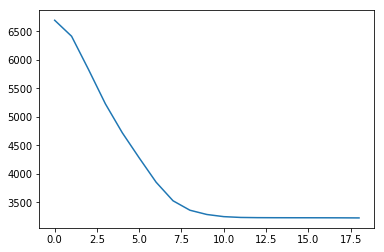

In [102]:
plt.plot(devided_model.score_tracker["perplexity_score"].value[1:])

In [55]:
import datetime

In [30]:
datetime.datetime.now().isoformat()

'2017-12-30T20:06:00.763984'

In [ ]:
def save_model(model):
    file_name = 'best_model_' + str(T) +"for_visartm_2"
    model.get_theta().to_pickle("theta") 
    model.get_phi().transform().to_pickle("phi")
    model.save(file_name)

In [106]:
save_model(devided_model)

In [58]:
lol = artm.ARTM(num_topics=21)